# TS2 — Sistemas Lineales e Invariantes en el Tiempo
-------

**Alumna:** María Serena Gil  

**Materia:** Análisis y Procesamiento de Señales — UNSAM 

**Docentes:** Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

**Año lectivo:** 2025

# Introducción

En este trabajo práctico analizo el comportamiento de un sistema discreto **LTI** a partir de su ecuación en diferencias. Uso como entradas las señales que generé en el TS1 y, para cada caso, obtengo y grafico la **salida** $y[n]$ asumiendo causalidad. Luego hallo la **respuesta al impulso** $h[n]$ y verifico los resultados por **convolución**. En todos los experimentos dejo explícitos los parámetros de simulación: $f_s$, $T_s$, **duración** y **energía/potencia** de la salida, según corresponda.  
Además, resuelvo dos sistemas adicionales (uno con **retardo en la entrada** y otro con **realimentación**) y cierro con la **discretización** del modelo de **Windkessel** de primer orden.


---

## 1) (a) Salida $y[n]$ para las entradas del TS1 (sistema causal)

Primero implemento el sistema del enunciado tal cual su ecuación en diferencias y obtengo la salida $y[n]$ para cada señal del TS1.  

\[
y[n] = 0.03\*x[n] + 0.05\*x[n-1] + 0.03\*x[n-2] + 1.5\*y[n-1] - 0.5\*y[n-2]
\]

Asumo **condiciones iniciales nulas** (señales causales).  
Para cada caso muestro el gráfico de $y[n]$ y reporto: $f_s$, $T_s=1/f_s$, duración y energía/potencia de $y[n]$.


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sistema_TS2(x):
    
    
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0 = x[n]
        x1 = x[n-1] if n >= 1 else 0.0
        x2 = x[n-2] if n >= 2 else 0.0
        y1 = y[n-1] if n >= 1 else 0.0
        y2 = y[n-2] if n >= 2 else 0.0
        y[n] = 0.03*x0 + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
    return y


1(a) Seno 2 kHz              | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Potencia=1.430669e-01
1(b) Amplificada + desfase π/2 | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Potencia=1.642808e-01
1(c) AM por f/2              | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Potencia=1.558197e-01
1(d) Recortada 75% (de 1c)   | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Potencia=9.687187e-02
1(e) Cuadrada 4 kHz          | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Potencia=4.328652e+00
1(f) Pulso rectangular 10 ms | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=1.261837e+05


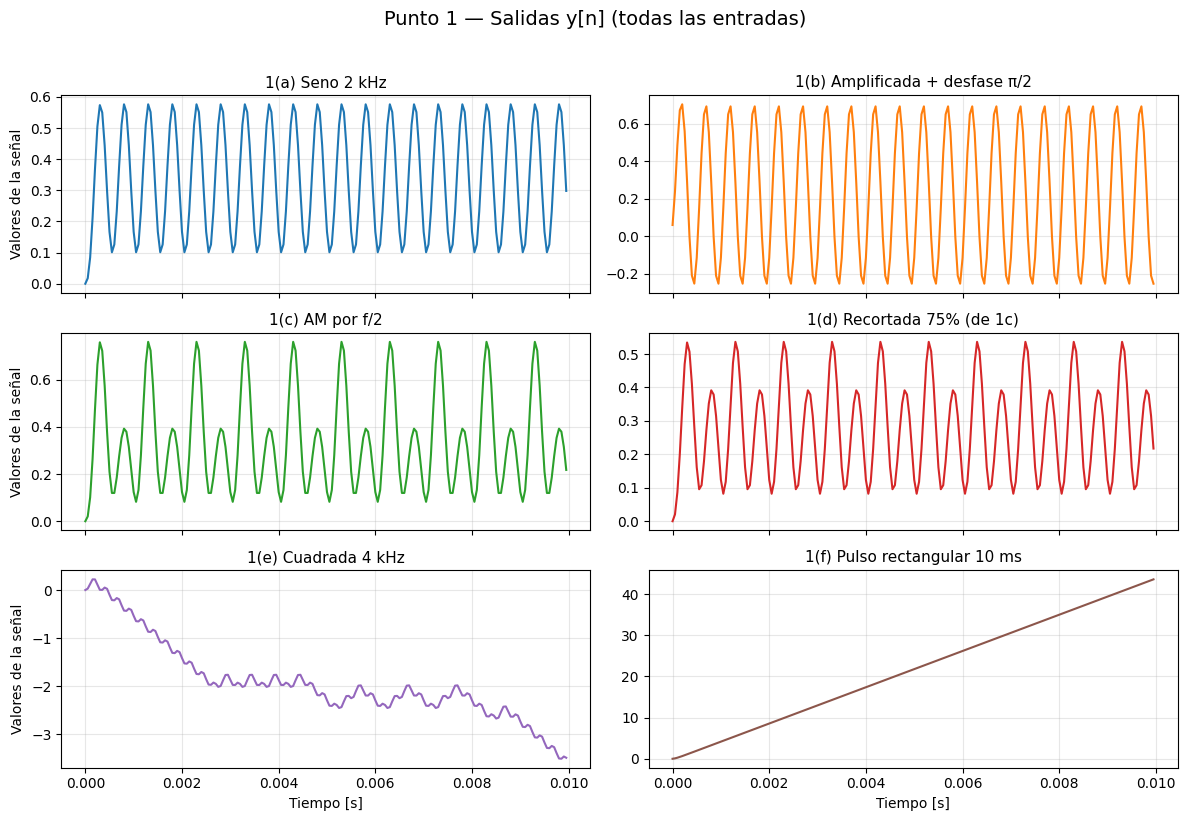

In [4]:
# Parámetros y señales de la TS1
fs = 20_000                       
t  = np.arange(0, 0.010, 1/fs)    

# 1(a) Seno 2 kHz
x1 = np.sin(2*np.pi*2000*t)

# 1(b) Amplificada + desfase π/2
x2 = 2*np.sin(2*np.pi*2000*t + np.pi/2)

# 1(c) AM por f/2 (m = 0.5)
x3 = (1 + 0.5*np.sin(2*np.pi*1000*t)) * np.sin(2*np.pi*2000*t)

# 1(d) Recortada 75% (de la 1c)
x4 = np.clip(x3, -0.75, 0.75)

# 1(e) Cuadrada 4 kHz
x5 = np.sign(np.sin(2*np.pi*4000*t))

# 1(f) Pulso rectangular 10 ms (0 a 10 ms en esta ventana)
x6 = np.where(t < 0.010, 1.0, 0.0)

# Entradas con sus nombres 
entradas = [
    ("1(a) Seno 2 kHz",                x1),
    ("1(b) Amplificada + desfase π/2", x2),
    ("1(c) AM por f/2",                x3),
    ("1(d) Recortada 75% (de 1c)",     x4),
    ("1(e) Cuadrada 4 kHz",            x5),
    ("1(f) Pulso rectangular 10 ms",   x6),
]

# colores para diferenciar las señales
palette = plt.get_cmap("tab10").colors

# Procesamiento de todas las entradas
resumen_p1 = []
ys_plot = []   

for i, (nombre, x) in enumerate(entradas):
    y  = sistema_TS2(x)           # es para la salida del sistema
    tt = t[:len(y)]

    Ts  = 1.0/float(fs)
    dur = len(y)/float(fs)

    # Calcular potencia para señales periódicas (1a a 1e), energía para señal finita (1f)
    if i < 5:  # Señales periódicas
        P = float(np.mean(y*y))
        resumen_p1.append((nombre, fs, Ts, dur, None, P))
        print(f"{nombre:28s} | fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s | Potencia={P:.6e}")
    else:      # Señal finita
        E = float(np.sum(y*y))
        resumen_p1.append((nombre, fs, Ts, dur, E, None))
        print(f"{nombre:28s} | fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s | Energía={E:.6e}")

    ys_plot.append((nombre, tt, y))

#  Figura 3×2 con colores distintos para cada señal
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
axs = axs.ravel()

for i, (nombre, tt, y) in enumerate(ys_plot):
    ax = axs[i]
    ax.plot(tt, y, color=palette[i % len(palette)], lw=1.5)
    ax.set_title(nombre, fontsize=11)
    ax.grid(True, alpha=0.3)
    if i % 2 == 0:
        ax.set_ylabel("Valores de la señal")
    if i >= 4:
        ax.set_xlabel("Tiempo [s]")

fig.suptitle("Punto 1 — Salidas y[n] (todas las entradas)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


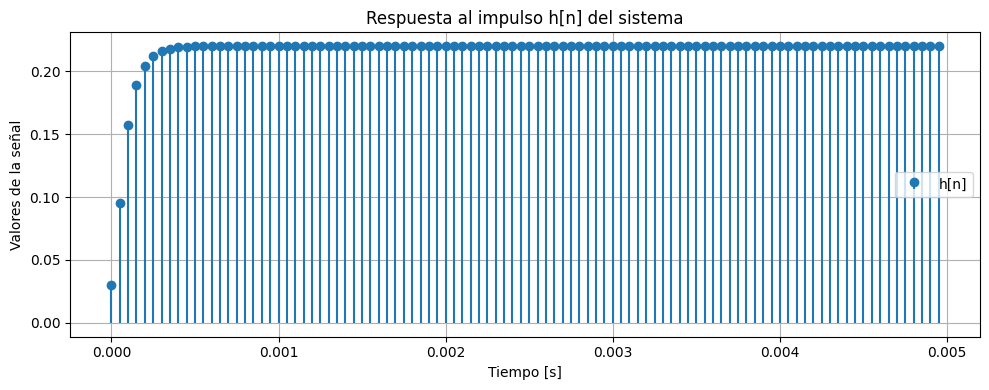

In [7]:
# Respuesta al impulso del sistema TS2
N_h = 100
delta = np.zeros(N_h); delta[0] = 1.0
h = sistema_TS2(delta)
t_h = np.arange(N_h)/float(fs)

plt.figure(figsize=(10,4))
plt.stem(t_h, h, basefmt=" ", label="h[n]")
plt.title("Respuesta al impulso h[n] del sistema")
plt.xlabel("Tiempo [s]"); plt.ylabel("Valores de la señal")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

---
**Resultados obtenidos — salidas $y[n]$**

- Calculé $y[n]$ por recurrencia directa para cada señal del TS1.  
- Reporté: $f_s$, $T_s$, duración, energía y potencia media de $y[n]$ (sobre la ventana simulada).  
- Observaciones:
  - 1(a) y 1(b): salida senoidal con cambio de amplitud y fase; transitorio corto al inicio.  
  - 1(c): en la salida se ve la envolvente de la modulación.  
  - 1(d): el recorte agrega armónicos; puede aparecer leve componente DC.  
  - 1(e): la salida sale “suavizada” (atenuación de armónicos altos).  
  - 1(f): como tiene DC, la salida muestra tendencia/deriva (el sistema tiene un polo en $z=1$).


---

## 1) (b) Respuesta al impulso $h[n]$ y verificación por convolución

Ahora obtengo la **respuesta al impulso** del sistema (salida ante $\delta[n]$) y vuelvo a generar la salida por **convolución** $y[n]=(x*h)[n]$ para **una** de las señales del TS1, comparando con la salida directa.

---

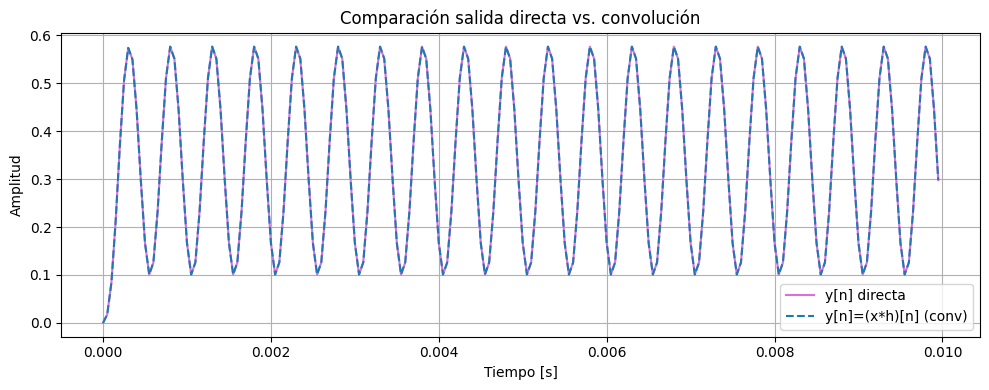

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s
Directa:     Energía=2.861339e+01 | Potencia=1.430669e-01
Convolución: Energía=2.861339e+01 | Potencia=1.430669e-01
Error L2(directa vs conv) = 7.788e-15


In [11]:
# Señal a verificar: 1(a)
x = x1
N = len(x)

# Respuesta al impulso con misma longitud que la entrada para evitar el truncado
delta = np.r_[1.0, np.zeros(N-1)]
h = sistema_TS2(delta)

# Salidas
y_dir  = sistema_TS2(x)
y_conv = np.convolve(x, h)[:N]   # recorte causal

# Gráfico comparativo
tt = t[:N]
plt.figure(figsize=(10,4))
plt.plot(tt, y_dir,  label="y[n] directa", color='orchid')
plt.plot(tt, y_conv, '--', label="y[n]=(x*h)[n] (conv)")
plt.title("Comparación salida directa vs. convolución")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Valores obtenidos y error
Ts = 1.0/float(fs)
dur = N/float(fs)
E_dir,  P_dir  = float(np.sum(y_dir*y_dir)),  float(np.mean(y_dir*y_dir))
E_conv, P_conv = float(np.sum(y_conv*y_conv)), float(np.mean(y_conv*y_conv))
err_L2 = float(np.linalg.norm(y_dir - y_conv))

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s")
print(f"Directa:     Energía={E_dir:.6e} | Potencia={P_dir:.6e}")
print(f"Convolución: Energía={E_conv:.6e} | Potencia={P_conv:.6e}")
print(f"Error L2(directa vs conv) = {err_L2:.3e}")


**Resultados obtenidos — $h[n]$ y convolución**

- Construí $h[n]$ como salida ante $\delta[n]$ con las mismas condiciones de causalidad.  
- La salida por **convolución** coincide con la **directa** (error $L^2$ muy chico), validando que el sistema se comporta como **LTI**.  
- Reporté $f_s$, $T_s$, **duración**, **energía** y **potencia** de ambas salidas.

La salida por convolución $y[n] = (x * h)[n]$ tiene mayor longitud que la señal original, porque la operación suma todas las combinaciones posibles entre $x[n]$ y $h[n]$. Para comparar correctamente con la salida directa, se recorta la convolución a la misma cantidad de muestras que la entrada. Así, ambas señales representan la respuesta del sistema en la misma ventana temporal y bajo las mismas condiciones causales.


---

## 2) (a) Sistema FIR con retardo en la entrada

**Ecuación en diferencias**
\[
y[n] = x[n] + 3\,x[n-10]
\]

- **Respuesta al impulso:** $h[n]=\delta[n]+3\,\delta[n-10]$ (FIR, causal y BIBO estable).
- **Entrada de prueba:** senoidal (uso la del TS1, p. ej., $x_1$ de 2 kHz).
- **Lo que muestro:** $h[n]$ y la salida $y[n]$. 
- **Reporte:** $f_s$, $T_s=1/f_s$, duración, energía y potencia.

---

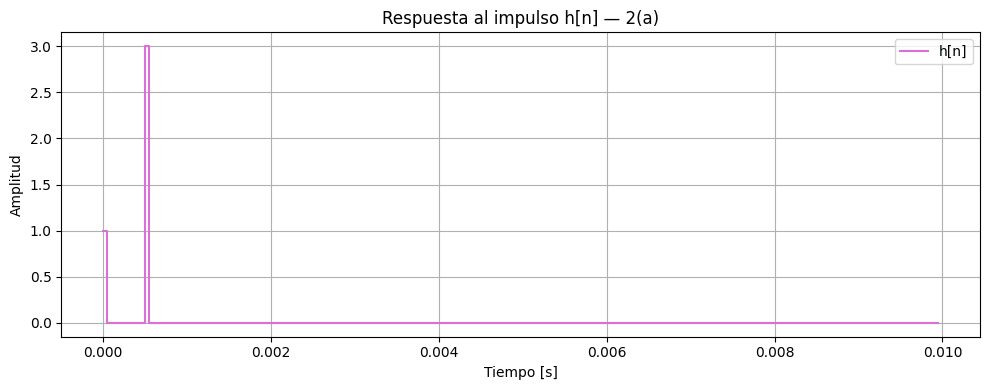

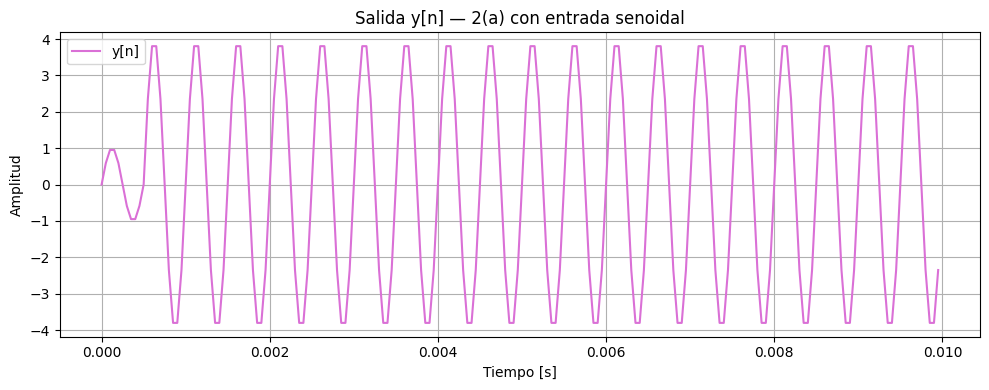

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=1.525000e+03 | Potencia=7.625000e+00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema: y[n] = x[n] + 3 x[n-10] ---
def sistema_2a(x):
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0  = x[n]
        x10 = x[n-10] if n >= 10 else 0.0
        y[n] = x0 + 3.0*x10
    return y

# Respuesta al impulso (truncada para visualizar)
N_h = 200
delta = np.zeros(N_h); delta[0] = 1.0
h = sistema_2a(delta)
t_h = np.arange(N_h)/float(fs)

plt.figure(figsize=(10,4))
plt.step(t_h, h, where="post", label="h[n]", color= 'orchid')
plt.title("Respuesta al impulso h[n] — 2(a)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Salida ante una senoidal (use la 1(a) de la TS1)
x = x1
y = sistema_2a(x)

tt = t[:len(y)]
plt.figure(figsize=(10,4))
plt.plot(tt, y, label="y[n]",color='orchid')
plt.title("Salida y[n] — 2(a) con entrada senoidal")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Parámetros 
Ts  = 1.0/float(fs)
dur = len(y)/float(fs)
E   = float(np.sum(y*y))     # energía en la ventana simulada
P   = float(np.mean(y*y))    # potencia media en la ventana simulada

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s | Energía={E:.6e} | Potencia={P:.6e}")


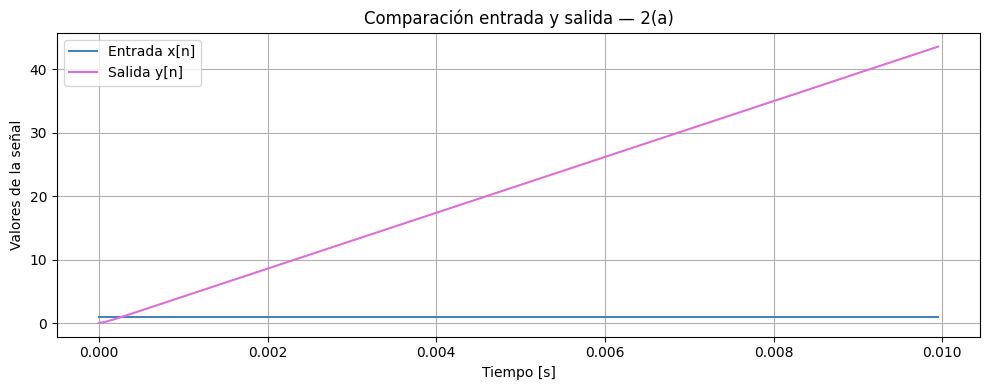

In [8]:
# Comparación entrada y salida del sistema 2(a)
plt.figure(figsize=(10,4))
plt.plot(tt, x, label="Entrada x[n]", color='steelblue')
plt.plot(tt, y, label="Salida y[n]", color='orchid')
plt.title("Comparación entrada y salida — 2(a)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Valores de la señal")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

---

**Resultados obtenidos — 2(a)**

- $h[n]=\delta[n]+3\,\delta[n-10]$: dos “impulsos” separados 10 muestras (retardo de $10\,T_s$).
- La salida $y[n]$ es la suma de la entrada y una copia retardada 10 muestras y escalada por 3.
- Con una senoidal, se observa interferencia que modifica amplitud y fase.
- El sistema es FIR y BIBO estable (coeficientes finitos).


---
## 2) (b) Sistema IIR con realimentación retardada

**Ecuación en diferencias**
$$
y[n] = x[n] + 3\,y[n-10]
$$

- **Función de transferencia:** $H(z)=\frac{1}{1-3z^{-10}}$ ⇒ polos en $|z|=3^{1/10}>1$ → **no BIBO estable**.
- **Respuesta al impulso:** $h[n]=\sum_{k=0}^{\infty} 3^{k}\,\delta[n-10k]$ (creciente por “bloques”).
- **Entrada de prueba:** senoidal del TS1 (uso $x_1$, 2 kHz).
- **Lo que muestro:** $h[n]$ truncada (para ver la estructura) y la salida $y[n]$ en una **ventana corta** para ver el crecimiento sin saturar el gráfico.

---

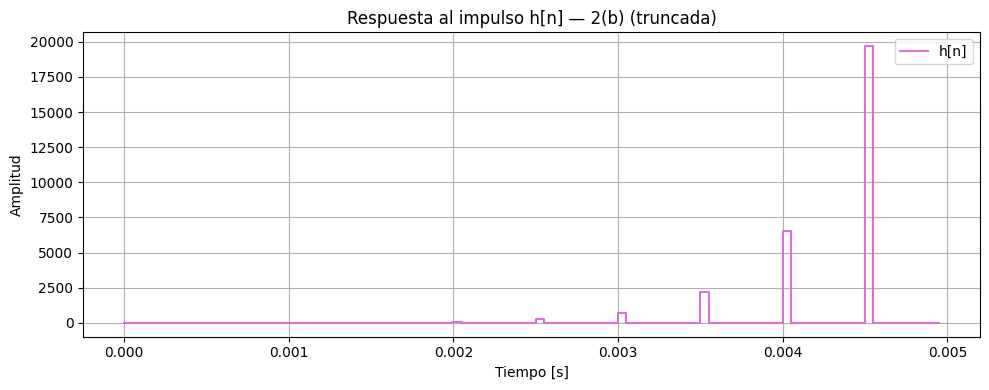

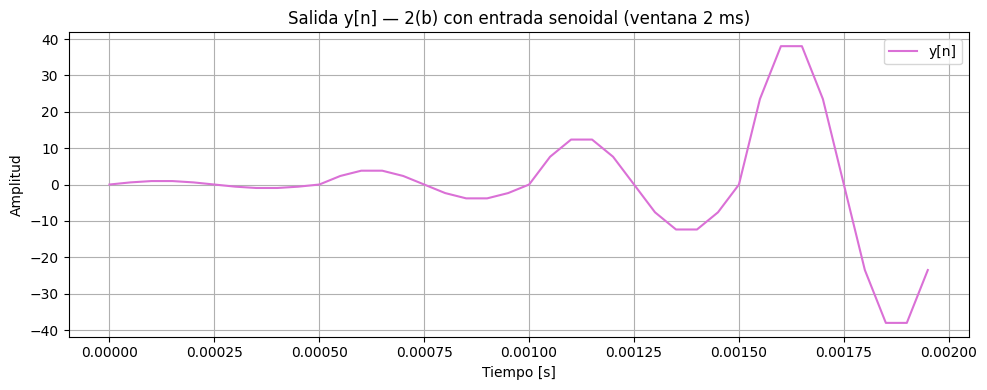

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.002000 s
Energía=8.930000e+03 | Potencia=2.232500e+02 | |y|_max=3.804226e+01


In [10]:
import numpy as np
import matplotlib.pyplot as plt

#  Sistema: y[n] = x[n] + 3 y[n-10] 
def sistema_2b(x):
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0  = x[n]
        y10 = y[n-10] if n >= 10 else 0.0
        y[n] = x0 + 3.0*y10
    return y

# Respuesta al impulso
N_h = 100                                  
delta = np.zeros(N_h); delta[0] = 1.0
h = sistema_2b(delta)
t_h = np.arange(N_h)/float(fs)

plt.figure(figsize=(10,4))
plt.step(t_h, h, where="post", label="h[n]", color='orchid')
plt.title("Respuesta al impulso h[n] — 2(b) (truncada)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Salida ante una senoidal
N_short = max(1, int(0.002*fs))           
x_short = x1[:N_short]
t_short = t[:N_short]

y = sistema_2b(x_short)

plt.figure(figsize=(10,4))
plt.plot(t_short, y, label="y[n]", color='orchid')
plt.title("Salida y[n] — 2(b) con entrada senoidal (ventana 2 ms)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Parámetros sobre la ventana simulada
Ts  = 1.0/float(fs)
dur = len(y)/float(fs)
E   = float(np.sum(y*y))        # energía en la ventana
P   = float(np.mean(y*y))       # potencia media en la ventana
ymax = float(np.max(np.abs(y)))

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s")
print(f"Energía={E:.6e} | Potencia={P:.6e} | |y|_max={ymax:.6e}")


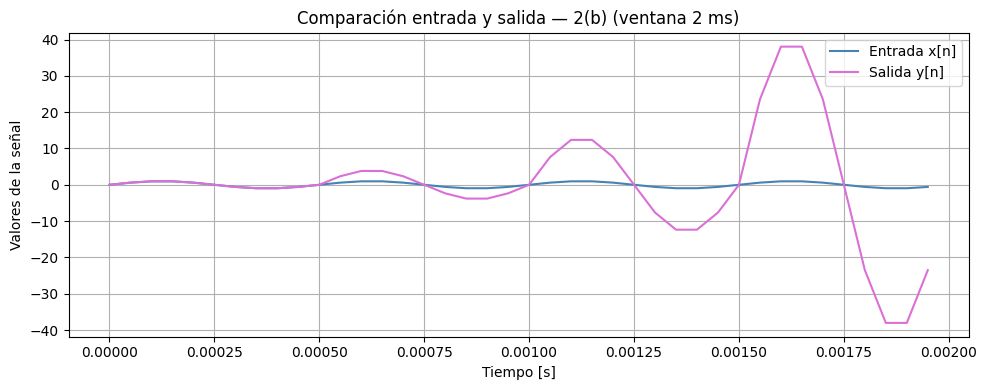

In [11]:
# Comparación entrada y salida del sistema 2(b) (ventana corta)
plt.figure(figsize=(10,4))
plt.plot(t_short, x_short, label="Entrada x[n]", color='steelblue')
plt.plot(t_short, y, label="Salida y[n]", color='orchid')
plt.title("Comparación entrada y salida — 2(b) (ventana 2 ms)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Valores de la señal")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

---

**Resultados obtenidos — 2(b)**

- $h[n]$ muestra “pulsos” cada 10 muestras con amplitudes $1,\,3,\,3^2,\dots$, lo que evidencia la **realimentación** y el crecimiento.
- La salida $y[n]$ ante una senoidal crece por “escalones” cada $10\,T_s$, confirmando que el sistema no es BIBO estable ($|z|=3^{1/10}>1$).
- Reporte (sobre la ventana simulada): $f_s$, $T_s$, duración, energía y potencia media impresas arriba.


----

## Conlusión punto 2

- **2(a) FIR con retardo:** $h[n]=\delta[n]+3\,\delta[n-10]$ (causal y BIBO estable).  
  La salida es la **suma** de la entrada y una copia retardada 10 muestras y escalada por 3.  
  Con senoidal se ve interferencia (cambio de amplitud/fase).

- **2(b) IIR con realimentación:** $H(z)=\frac{1}{1-3z^{-10}}$ ⇒ polos con $|z|=3^{1/10}>1$ → no BIBO estable.  
  $h[n]=\sum_{k=0}^{\infty}3^k\,\delta[n-10k]$ (crece por bloques).  
  La salida ante senoidal crece cada $10\,T_s$.

**Comparación breve:** el (a) es estable y actúa como “eco corto” (retardo+escala); el (b) es inestable por la realimentación $>1$, por eso la respuesta y la salida crecen.


---
## Bonus — Discretización del modelo de Windkessel (1er orden)

Modelo continuo:
$$
C\,\frac{dP(t)}{dt} + \frac{1}{R}\,P(t) = Q(t)
\qquad\Rightarrow\qquad
H(s)=\frac{P(s)}{Q(s)}=\frac{R}{1+RC\,s}
$$

Lo discretizo con **Euler implícito** (robusto):
$$
P[n] = \alpha\,P[n-1] + \beta\,Q[n],\qquad
\alpha=\frac{C}{C+\tfrac{T_s}{R}},\quad
\beta=\frac{T_s}{C+\tfrac{T_s}{R}}
$$

Uso valores típicos de referencia: **$C=1.5$ mL/mmHg**, **$R=1.0$ mmHg·s/mL**.  
Entrada $Q[n]$: caudal **pulsátil** (72 lpm ≈ 1.2 Hz). Reporto $f_s$, $T_s$, duración y la **constante de tiempo** $RC$.

---

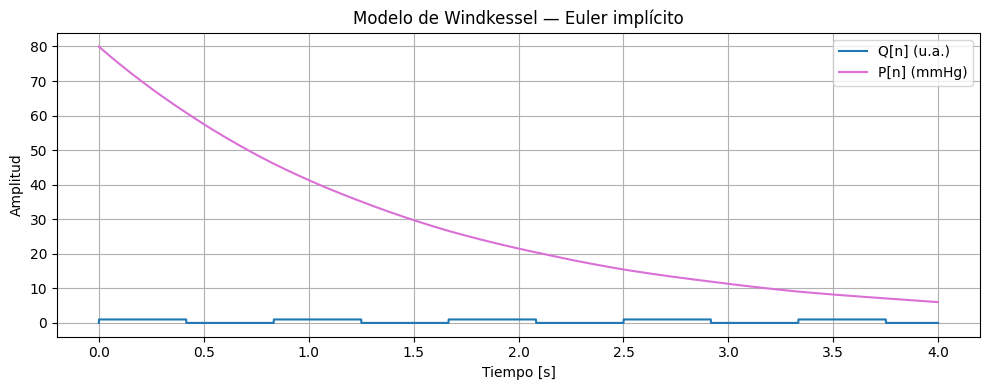

fs = 1000 Hz | Ts = 1.000000e-03 s | duración = 4.00 s | RC = 1.50 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
fs_w = 1000          
Ts_w = 1/fs_w
t_w  = np.arange(0, 4.0, Ts_w)  

# Parámetros Windkessel (referencia)
C = 1.5   # mL/mmHg
R = 1.0   # mmHg*s/mL
tau = R*C # constante de tiempo [s]

# Caudal pulsátil 
f_hr = 72/60.0                       
Q = (np.sin(2*np.pi*f_hr*t_w) > 0).astype(float)  


# Euler implícito
alpha = C / (C + Ts_w/R)
beta  = Ts_w / (C + Ts_w/R)

P = np.zeros_like(Q, dtype=float)
P0 = 80.0  
P_prev = P0
for n in range(len(Q)):
    Pn = alpha*P_prev + beta*Q[n]
    P[n] = Pn
    P_prev = Pn

# Gráfico
plt.figure(figsize=(10,4))
plt.plot(t_w, Q, label="Q[n] (u.a.)")
plt.plot(t_w, P, label="P[n] (mmHg)", color='orchid')
plt.title("Modelo de Windkessel — Euler implícito")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

print(f"fs = {fs_w} Hz | Ts = {Ts_w:.6e} s | duración = {t_w[-1]:.2f} s | RC = {tau:.2f} s")


---

**Resultados obtenidos — Bonus**

- Ecuación continua: $C\,\dot P + \tfrac{1}{R}P = Q$. La discretización por **Euler implícito** queda $P[n]=\alpha P[n-1]+\beta Q[n]$ con $\alpha=\tfrac{C}{C+T_s/R}$ y $\beta=\tfrac{T_s}{C+T_s/R}$.
- Con $C=1.5$ mL/mmHg y $R=1.0$ mmHg·s/mL obtengo $RC \approx 1.5$ s. La presión $P[n]$ sigue la forma pulsátil de $Q[n]$ pero suavizada (filtro pasabajos de 1er orden).
- Al aumentar $R$ o $C$ (mayor $RC$) la señal se vuelve más lenta y con menos rizo; al disminuirlos, responde más rápido.
- Parámetros reportados: $f_s=1000$ Hz, $T_s=1$ ms, duración $4$ s, y $RC$ impreso arriba.

---

## Conclusiones

- El sistema del Punto 1 se comportó como **LTI** y la salida por **convolución** coincidió con la salida directa (error $L^2$ muy chico).
- Observando la salida ante una entrada con componente **DC** (por ejemplo, el pulso), se ve tendencia/deriva en $y[n]$, lo que indica que el sistema no es estable.
- En **2(a)** (FIR con retardo) el sistema es **estable** porque, ante una entrada acotada (senoidal), la salida también se mantiene acotada y no crece indefinidamente. Se observa que la salida es la suma de la entrada y una copia retardada y escalada, lo que genera interferencia pero no inestabilidad.
- En **2(b)** (IIR con realimentación) el sistema es **inestable** porque, ante una entrada acotada, la salida crece por bloques cada $10T_s$ y no se mantiene limitada. Esto se observa claramente en los gráficos comparativos: la salida aumenta de forma escalonada, evidenciando la inestabilidad.
- **Bonus (Windkessel):** la discretización por **Euler implícito** se comporta como un **pasabajos** de 1er orden; al aumentar $RC$ la respuesta es **más lenta** y **más suave**.

---

## Autoevaluación del aprendizaje

Puede resolver bien la tarea, aunque me quedaron algunas dudas puntuales. Pude implementar la ecuación en diferencias y analizar la salida $y[n]$ para distintas entradas. La parte de respuesta al impulso $h[n]$ y la verificación por convolución me ayudaron a validar que el sistema es LTI. También entendí mejor por qué el polo en $z=1$ implica que el sistema no es BIBO estable (aparece tendencia cuando hay componente DC). En el Bonus, conecté el modelo de Windkessel con un filtro de primer orden y vi cómo el parámetro $RC$ controla la velocidad de respuesta.

**Lo que aprendí / me quedó claro:**  
- Pasar de una LCCDE a código y simular con $f_s$ y $T_s$ bien definidos.  
- Obtener $h[n]$ y reproducir salidas por $(x*h)[n]$, viendo que coinciden con la implementación recursiva.  
- Diferencia entre **FIR** estable con retardo y **IIR** con realimentación que puede ser inestable.  
- En Windkessel, $RC$ grande ⇒ respuesta más lenta y suave; $RC$ chico ⇒ más rápida y con más rizo.

**Lo que todavía me cuesta:**  
- Anticipar solo mirando $H(z)$ cómo va a verse el transitorio y la fase sin simular.  
- Elegir siempre la ventana/longitud justa para no truncar $h[n]$ en convoluciones largas.

**Uso de IA :**  
Usé IA para detalles de código para la **convolución**, chequear conceptos de **estabilidad BIBO** y del parámetro **$RC$**.  
Además, la usé para **ordenar y corregir el formato de los Markdown** (títulos/listas y ecuaciones).
